In [1]:
%matplotlib inline
import pandas as pd
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from torch.utils.data.dataloader import default_collate
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from IPython.display import clear_output
from torch.autograd import Variable
print(torch.__version__)

0.4.1


    time  x_acc  y_acc  z_acc  x_gyro  y_gyro  z_gyro label
0  10000  0.092 -0.041 -0.028  11.265   2.235    9.82     a
1  10000  0.092 -0.041 -0.028  11.265   2.235    9.82     a
2  10000  0.092 -0.041 -0.028  11.265   2.235    9.82     a
3  10000  0.092 -0.041 -0.028  11.265   2.235    9.82     a
4  10000  0.092 -0.041 -0.028  11.265   2.235    9.82     a


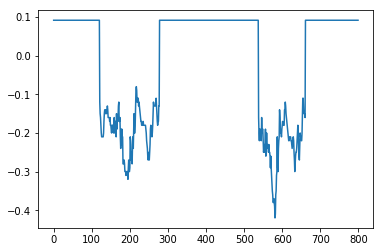

In [10]:
# Loading the data
df = pd.read_csv('all_data/all.csv', names = ['time', 'x_acc', 'y_acc', 'z_acc', 'x_gyro', 'y_gyro', 'z_gyro', 'label'])
print(df.head())
# print(df['label'][100800 : 100801])
plt.plot(df['x_acc'][ : 800])

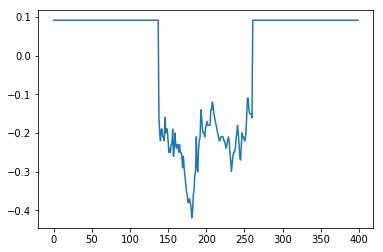

In [24]:
readings = df['x_acc'][400 : 800].values.tolist()
plt.plot(readings)

In [17]:
# recursive implementation of Moving Average Filter
def moving_average(signal, length = 5):
    new_reading = list()
    sum_ = 0
    for i in range(length):
        new_reading.append(signal[i])
        sum_ += signal[i]
    for i in range(len(signal) - (2 * length)):
        sum_ = sum_ - signal[i] + signal[i + length]
        new_reading.append(sum_ / length)
    for i in range(length):
        new_reading.append(signal[i + len(signal) - 2 * length])
    
    return new_reading

400


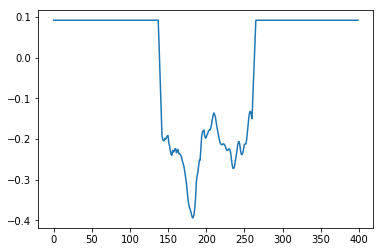

In [25]:
new_readings = moving_average(readings, length = 5)
new_readings2 = moving_average(readings, length = 10)
print(len(new_readings))
plt.plot(new_readings)

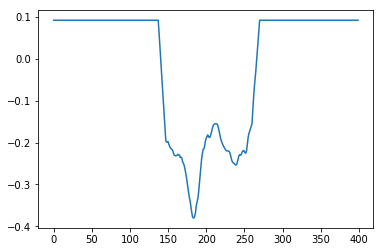

In [26]:
plt.plot(new_readings2)